# Lezione 3 - Visualizzazione dati e integrali 

In [59]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
import math

## Leggere e scrivere dati su file di testo
Ci sono due modalità per scrivere/leggere su file: un modo è scrivere testo, l'altro è scrivere binario. Scrivere un file di testo è preferibile, perché è human-readable. D'altra parte, scrivere su un file in binario significa sostanzialmente trascrivere il contenuto della memoria su un file così come si presenta, non è comprensibile all'uomo e bisogna dire al computer come interpretare il file binario, ma è più "compatto" di un file testuale, occupa meno spazio. E' preferibile usare il binario solo in presenza di una grande quantità di dati per velocizzarne la lettura/scrittura (libreria `pickle`)

### Scrivere informazioni
Per scrivere dati su un file di testo:

In [32]:
sample = [1.1, 2.2, 3.3, 4.4, 5.5]

with open("some.txt", "w") as output_file:
    for item in sample:
        output_file.write(str(item) + '\n')

Funziona anche con numpy array, tuple e dict. Bisogna pensare alla keyword `with` come un blocco di codice che esegue solo se la funzione `open()` esegue con successo. L'altro vantaggio è che usando questa sintassi, alla fine del `with` il file viene chiuso automaticamente, senza dover usare `output_file.close()`. Per leggere un file di testo, invece

In [33]:
read_sample = []

with open("some.txt") as input_file:
    lines = input_file.readlines()
    print(lines) # Non necessario
    for line in lines:
        read_sample.append(float(line))

print(read_sample)

['1.1\n', '2.2\n', '3.3\n', '4.4\n', '5.5\n']
[1.1, 2.2, 3.3, 4.4, 5.5]


Alternativamente, usando una notazione compatta

In [34]:
with open("some.txt") as input_file:
    read_sample = [float(line) for line in input_file.readlines()]

print(read_sample)

[1.1, 2.2, 3.3, 4.4, 5.5]


Alternativamente esiste una funzione built-in di NumPy per leggere un file di testo e inserire i dati all'interno di un NumPy array

In [35]:
read_sample = np.loadtxt("some.txt")
print(read_sample)

[1.1 2.2 3.3 4.4 5.5]


## Istogrammi in MatPlotLib
Per disegnare un istogramma in Python, il modo più semplice è

(array([1., 0., 1., 0., 1., 0., 0., 1., 0., 1.]),
 array([1.1 , 1.54, 1.98, 2.42, 2.86, 3.3 , 3.74, 4.18, 4.62, 5.06, 5.5 ]),
 <BarContainer object of 10 artists>)

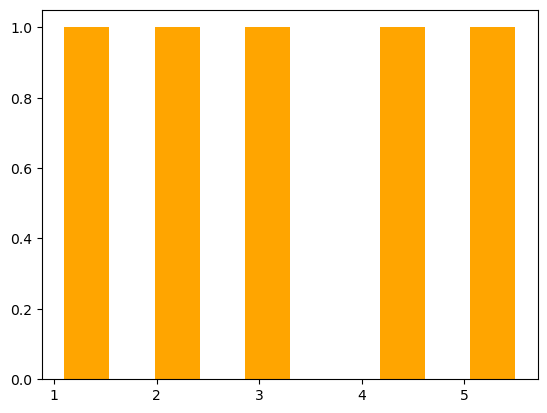

In [36]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.hist(sample, color = "orange")

In questo caso l'intervallo di rappresentazione e la suddivisione in bin sono scelti automaticamente dalla funzione `hist()`. Noi però vogliamo impostarli manualmente, questo si fa con

(array([1., 1., 2., 1.]),
 array([0. , 1.5, 3. , 4.5, 6. ]),
 <BarContainer object of 4 artists>)

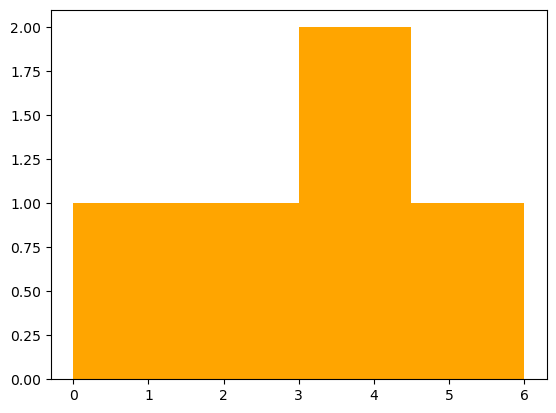

In [37]:
x_min = 0.0
x_max = 6.0
n_bins = 5

bin_edges = np.linspace(x_min, x_max, n_bins)
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.hist(sample, bins = bin_edges, color = "orange")

### Numero di bin
Il numero di bin deve sempre essere adattato in base alla grandezza del campione.
- Se il numero di eventi aumenta è preferibile aumentare il numero di bin
- Se il numero di eventi diminuisce è preferibile diminuire il numero di bin, ma bisogna stare attenti a non perdere troppa informazione, perché diminuendo il numero di bin inevitabilmente si perde la forma della distribuzione

Non esistono regole assolute per determinare il numero di bin ottimale in ogni caso, ma varia di esperimento in esperimento. Esiste una rule-of-thumb detta regola di Sturges, che in molti casi è ragionevole

In [38]:
def sturges(n_events):
    return int(np.ceil(1 + 3.322 * np.log(n_events)))

n_bins = sturges(len(sample))
bin_edges = np.linspace(x_min, x_max, n_bins)

### Scala logaritmica
Quando i valori in diversi bin cambiano drasticamente tra loro può essere conveniente visualizzare l'istogramma usando una scala logaritmica sull'asse delle ordinate

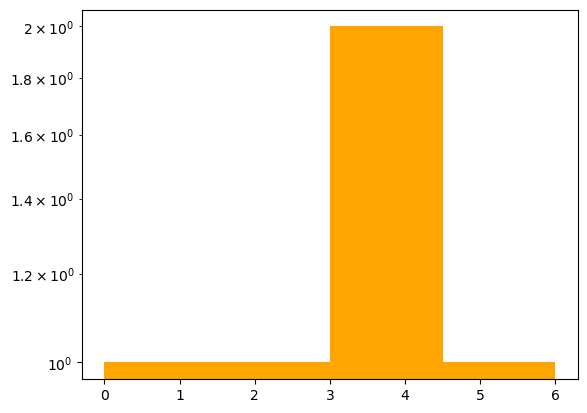

In [39]:
x_min = 0.0
x_max = 6.0
n_bins = 5

bin_edges = np.linspace(x_min, x_max, n_bins)
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.hist(sample, bins = bin_edges, color = "orange")
ax.set_yscale("log")

## Calcolare e rappresentare momenti del campione
### Media
Per calcolare la media campionaria

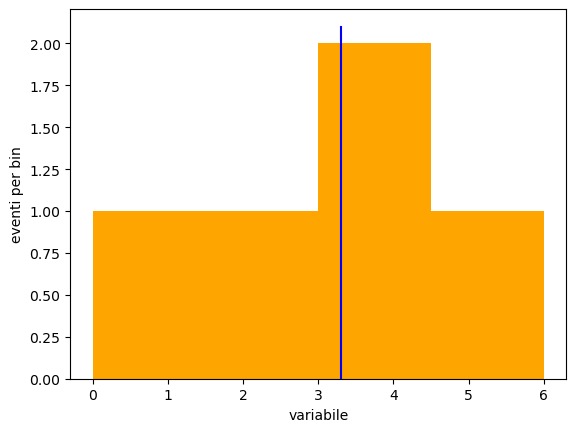

In [42]:
media = sum(sample) / len(sample)

x_min = 0.0
x_max = 6.0
n_bins = 5

bin_edges = np.linspace(x_min, x_max, n_bins)
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.hist(sample, bins = bin_edges, color = "orange")
ax.set_xlabel("variabile")
ax.set_ylabel("eventi per bin")

# Plot della media del campione
vertical_limits = ax.get_ylim()
ax.plot([media, media], vertical_limits, color = "blue")

Lo stesso vale per tutti gli altri momenti (varianza, skewness, kurtosi, ...)

## Distribuzioni con SciPy

### Probability Distribution Functions (PDF)
PDF notevoli esistono come funzioni già implementate nella libreria `scipy`, la lista completa può essere consultata sulla [documentazione scipy](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats). Tutte le distribuzioni continue accettano come parametri le keyword `loc` e `scale`, per impostare la posizione e la scala della distribuzione. Per esempio, nella gaussiana `loc` è la media e `scale` è la deviazione standard.


In [46]:
media = 1.0
sigma = 0.5
x = (media + sigma) * 0.5
print(norm.pdf(x, media, sigma)) # Il metodo pdf() serve per accedere al valore della pdf in un punto

0.704130653528599


E' inoltre possibile fissare una volta per tutte i parametri della pdf nel modo seguente

In [48]:
norm_fixed = norm(media, sigma)
print(norm_fixed.pdf(x))

0.704130653528599


Nota bene: per le PDF discrete, per esempio la binomiale, si deve usare il metodo `pmf()` invece di `pdf()`.

### Cumulative Distribution Functions (CDF)
Per ottenere la CDF associata si usa `norm.cdf(x, loc, scale)`

In [49]:
print(norm.cdf(x, media, sigma))

0.3085375387259869


### Momenti di una PDF
E' possibile calcolare i momenti della pdf in questione usando un metodo built-in di SciPy

In [50]:
media, varianza, skew, kurt = norm_fixed.stats(moments = "mvsk")
print(media, varianza, skew, kurt)

1.0 0.25 0.0 0.0


## Integrali di funzioni con SciPy
La libreria `scipy` contiene anche funzioni utili per il calcolo numerico di integrali. La funzione `quad()` calcola un integrale definito data una funzione e un intervallo di integrazione

In [54]:
# Intervallo
a = 0.0
b = 4.0

# Funzione
def f(x):
    return x**2 + x + 1

In [55]:
integrale = quad(f, a, b)
print("Integrale di f: " + str(integrale[0]))
print("Stima dell'errore: " + str(integrale[1]))

Integrale di f: 33.33333333333333
Stima dell'errore: 3.700743415417188e-13


Per integrare su intervalli illimitati si usa `np.inf`

In [60]:
# Intervallo
a = 0.0
b = np.inf

# Funzione
def f(x):
    return np.exp(-x)

In [61]:
integrale = quad(f, a, b)
print("Integrale di f: " + str(integrale[0]))
print("Stima dell'errore: " + str(integrale[1]))

Integrale di f: 1.0000000000000002
Stima dell'errore: 5.842606742906004e-11
